
# Galactic Astrophysics Notebook

## Part 3 Ram Pressure Stripping

In this task, you will plot the restoring force for the gas in the disk of a galaxy. You can then compare this to the ram pressure experienced by the galaxy as it falls form the edge, to the centre of the galaxy cluster to see if the gas in the disk will be stripped, and at what radius. 

### Task 3.1



In this task, you will plot the resoring force of the gas in a galaxy disk. 

First install some important modules, numpy, matplotlib and math. 

In [47]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [11]:
GRAV= 6.67E-8
#Unit conversions                                                                                                  
Msun2g = 1.989E33
pc2cm = 3.086E18
cm_to_kpc = 3.08E21

The 2D, surface density profile of the gas disk can be described as a double exponential disk:


$ \rho(r) = \frac{M_{gas}}{2\pi a^{2}_{gas}} e^{\frac{-r}{a_{gas}}}$

$\rho(r)$ is the gas density as a funciton of radius.

$M_{gas}$ is the total mass of the gas disk. 

$a_{gas}$ is the scale radius of the gas disk.



For this example, you can take the following values (you can play with these later to see what happens).

$M_{gas} = 5\times10^{9} M_{\odot}$ 

$a_{gas} = 600pc$ 

Define these variables in your code and convert them to cgs units in a similar way to that in the supernova remnants notebook.


In [12]:
#Galaxy properties disk1                                                                                           
disk1_Mgas = 5E9
disk1_Mgas_g = disk1_Mgas * Msun2g
disk1_rs = 600.0
disk1_rs_cm = disk1_rs * pc2cm
disk1_zs = 70.0
disk1_zs_cm = disk1_zs * pc2cm

The resorting force is given by the equation:

$F_{res} = 2\pi G \Sigma(r)_{gas} \Sigma(r)_{DM}$

We also need the total surface density of the disk. This should incldue all components, but here we will just add the dark matter component.

This is actually quite complicated. We model the dark matter components as a 3D spherical profile, so we need to integrate this to solve for the surface density looking through the disk. I use the Burkert dark matter profile which is more suited towards dwarf galaxies. 

To calculate the gas surface density as a function of radius ($\Sigma_{gas}$) and the dark matter surface density as a function of raduis ($\Sigma_{DM}$ so that we can calculate the resroting forace as a function of radius. 

I have provided some of the code below

In [13]:
#Dark matter halo parameters                                                                                       
DMr0 = 9500 * pc2cm                                                                                         
rhoDM = 6.7996E-25                                                                                           
zmax = DMr0
zmin = -1.0 * DMr0

#Define the ranges and steps
rmax = 20000  #pc                                                                                                  
rstep = 100
num = int(rmax/rstep)

#Set up the empty arrays
rho_surf_DM = np.zeros(num)
rho_surf_gas_disk1 = np.zeros(num)
rho_surf_gas_disk2_1 = np.zeros(num)
rho_surf_gas_disk2_2 = np.zeros(num)
rho_surf_gas_disk2_tot = np.zeros(num)
res_force_disk1 = np.zeros(num)
res_force_disk2_1 = np.zeros(num)
res_force_disk2_2 = np.zeros(num)
res_force_disk2_tot = np.zeros(num)
radius = np.zeros(num)

In [18]:
for i in range(0, rmax, rstep):

    r1 = i
    r2 = i + rstep
    r1_cm= r1 *pc2cm
    r2_cm= r2*pc2cm
    if(i==0):
        j = 0
    else:
        j=j+1

    r = r1 + rstep/2
    r = r * pc2cm

    #This is the portion of the code calculating the DM surface density. Is has several terms 
    #So they are calculated one at a time and combined later
    term1 = 2.0 * rhoDM * DMr0**3
    if(r > DMr0):
        term2 = math.atan((DMr0*zmax)/(((r**2 - DMr0**2)**0.5)*((r**2 + zmax**2)**0.5)))
        term3 = math.sqrt(r**2 - DMr0**2)
    term4 = math.atanh((DMr0*zmax)/(math.sqrt(DMr0**2 + r**2)*math.sqrt(r**2 + zmax**2)))
    term5 = math.sqrt(DMr0**2 + r**2)
    if(r>DMr0):
        term6 = math.atan(zmax/(math.sqrt(r**2 - DMr0**2)))
    term7 = math.atan(zmax/(math.sqrt(DMr0**2 + r**2)))
    term8 = 2*DMr0
    
    if(r > DMr0):
        rho_surf_DM[j] = term1 * ((term2/term3) + (term4/term5) - (term6/term3) + (term7/term5)) /term8
    else:
        rho_surf_DM[j] = term1 * ((term4/term5) +  (term7/term5)) / term8

    #Now insert some code here to calculate the disk surface density. 
    rho_surf_gas_disk1[j] = disk1_Mgas_g / (2.0 * math.pi * disk1_rs_cm**2) * math.exp(-r/disk1_rs_cm)

    #Now insert some code here to calculate the restoring force using the equation above:
    #Ensure you convert the units of radius from cm back to pc first. 
    radius[j] = r / pc2cm

    res_force_disk1[j] = 2.0 * math.pi * GRAV * rho_surf_gas_disk1[j] * rho_surf_DM[j]

print(radius)
radius = radius/1E3
print(res_force_disk1)

[   50.   150.   250.   350.   450.   550.   650.   750.   850.   950.
  1050.  1150.  1250.  1350.  1450.  1550.  1650.  1750.  1850.  1950.
  2050.  2150.  2250.  2350.  2450.  2550.  2650.  2750.  2850.  2950.
  3050.  3150.  3250.  3350.  3450.  3550.  3650.  3750.  3850.  3950.
  4050.  4150.  4250.  4350.  4450.  4550.  4650.  4750.  4850.  4950.
  5050.  5150.  5250.  5350.  5450.  5550.  5650.  5750.  5850.  5950.
  6050.  6150.  6250.  6350.  6450.  6550.  6650.  6750.  6850.  6950.
  7050.  7150.  7250.  7350.  7450.  7550.  7650.  7750.  7850.  7950.
  8050.  8150.  8250.  8350.  8450.  8550.  8650.  8750.  8850.  8950.
  9050.  9150.  9250.  9350.  9450.  9550.  9650.  9750.  9850.  9950.
 10050. 10150. 10250. 10350. 10450. 10550. 10650. 10750. 10850. 10950.
 11050. 11150. 11250. 11350. 11450. 11550. 11650. 11750. 11850. 11950.
 12050. 12150. 12250. 12350. 12450. 12550. 12650. 12750. 12850. 12950.
 13050. 13150. 13250. 13350. 13450. 13550. 13650. 13750. 13850. 13950.
 14050

Now we can plot the restoring force as a funciton of radius. 

Apply a log scale to both axes and ensure to label the axes.

No handles with labels found to put in legend.


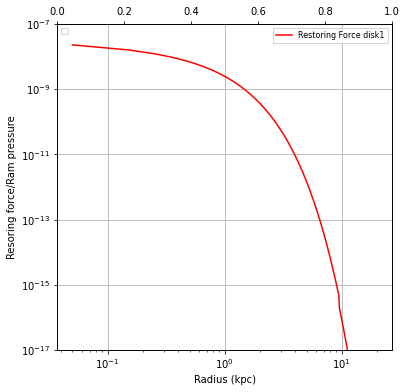

In [19]:
fig = plt.figure(1, figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(radius, res_force_disk1, label='Restoring Force disk1', color='red')
#ax.plot(radius, res_force_disk2_1, label='disk2 1', color='green', linestyle='dotted')
#ax.plot(radius, res_force_disk2_2, label='disk2 2', color='green', linestyle='dashed')
#ax.plot(radius, res_force_disk2_tot, label='disk2 tot', color='green', linestyle='solid')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Radius (kpc)')
ax.legend(loc=1, fontsize=8)
ax2 = ax.twiny()
#ax2.plot(t, ram_pressure, label='Ram pressure', color='black')
#ax2.plot(t2, ram_pressure2, label='Ram pressure', color='black', linestyle='dashed')
#ax2.set_xlabel('Time (Myr)')
plt.ylim(1E-17,  1E-7)
ax.set_ylabel('Resoring force/Ram pressure')
ax2.legend(loc=2, fontsize=8)
ax.grid(axis='y')
ax.grid(axis='x')
plt.savefig("test.pdf")
plt.show()


### Task 3.2

Now lets plot the ram pressure that will act on the galaxy as it moves from the edge of the cluster to the centre of the cluster so we can compare it with the restoring force and see if the galaxy gas will be stripped!

The equation for ram pressure is:

$P_{ram}=\rho v^{2}$

As the density of the ICM and the velocity of the galaxy changes as the galaxy moves through the cluster the ram pressure will change. 
The ram pressure is a function of $r_{cluster}$ (this is the distance from the centre of the cluster)

$P_{ram}(r)=\rho(r) v(r)^{2}$

We could calculate this using models for the density profile of the ICM and for the gravitational potential of the galaxy cluster (to calculate the velocity). Here, some files have been provided for you.


In the folder on github, there are two files which provide the velocity of the galaxy as it moves through the cluster and the density of the ICM at the position of the galaxy. Both of these values are shown over time, from 0 to 1000Myr. 

cluster_vel.dat contains the velocity of the galaxy in km/s (in the second column) and cluster_dens.dat contains the density of the ICM (in $gcm^{-3}) in the second column. Both files have the time (in Myr) in the first column. 

Read in the two data files and calculate the ram pressure as a function of time

In [42]:
clustervel = np.loadtxt('cluster_vel.dat')
clustervel = np.array(clustervel)
time1 = clustervel[:,0]
velocity = clustervel[:,1]
velocity = velocity * 1000

clusterdens = np.loadtxt('cluster_dens.dat')
clusterdens = np.array(clusterdens)
time1 = clusterdens[:,0]
density = clusterdens[:,1]

print(time1)
print(density)
print(velocity)

[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.  180.  190.  200.  210.  220.  230.
  240.  250.  260.  270.  280.  290.  300.  310.  320.  330.  340.  350.
  360.  370.  380.  390.  400.  410.  420.  430.  440.  450.  460.  470.
  480.  490.  500.  510.  520.  530.  540.  550.  560.  570.  580.  590.
  600.  610.  620.  630.  640.  650.  660.  670.  680.  690.  700.  710.
  720.  730.  740.  750.  760.  770.  780.  790.  800.  810.  820.  830.
  840.  850.  860.  870.  880.  890.  900.  910.  920.  930.  940.  950.
  960.  970.  980.  990. 1000.]
[1.23914e-31 1.24057e-31 1.24486e-31 1.25204e-31 1.26217e-31 1.27531e-31
 1.29156e-31 1.31103e-31 1.33385e-31 1.36019e-31 1.39023e-31 1.42421e-31
 1.46237e-31 1.50499e-31 1.55241e-31 1.60500e-31 1.66316e-31 1.72736e-31
 1.79815e-31 1.87611e-31 1.96190e-31 2.05630e-31 2.16013e-31 2.27435e-31
 2.40005e-31 2.53843e-31 2.69085e-31 2.85886e-31 3.04421e-31 3.24886e-31
 3.47505e-31 3.7253

In [43]:
ram_pressure = np.zeros(101)
j=0

for i in range(0, 1010, 10):
    print(i)
    ram_pressure[j] = density[j] * velocity[j]**2
    j=j+1
        
print(ram_pressure)
print(time1)
print(len(time1))

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
[0.00000000e+00 2.21485142e-22 8.89004227e-22 2.01179009e-21
 3.60548102e-21 5.69218617e-21 8.30116485e-21 1.14691866e-20
 1.52408706e-20 1.96700991e-20 2.48204687e-20 3.07667750e-20
 3.75961545e-20 4.54091450e-20 5.43231499e-20 6.44734451e-20
 7.60145633e-20 8.91257210e-20 1.04014532e-19 1.20917225e-19
 1.40107112e-19 1.61900427e-19 1.86658523e-19 2.14800909e-19
 2.46811121e-19 2.83246414e-19 3.24758683e-19 3.72085176e-19
 4.26098667e-19 4.87810683e-19 5.58374426e-19 6.39155769e-19
 7.31746772e-19 8.37969302e-19 9.59982522e-19 1.10031686e-18
 1.26188504e-18 1.44815815e-18 1.66314755e-18 1.91160936e

Now we have the ram pressure as a funciton of time. The units of restoring force and ram pressure are equivalent, so we can plot them on the same graph to directly compare. Keep the bottom x-axis as the radius of the galaxy as on the last plot, and now plot the time on the top x-axis so you can see both lines on the same plot. 

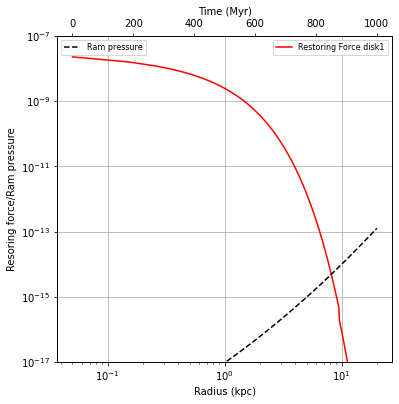

In [45]:
fig = plt.figure(1, figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(radius, res_force_disk1, label='Restoring Force disk1', color='red')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Radius (kpc)')
ax.legend(loc=1, fontsize=8)
ax2 = ax.twiny()
#ax2.plot(t, ram_pressure, label='Ram pressure', color='black')
ax2.plot(time1, ram_pressure, label='Ram pressure', color='black', linestyle='dashed')
ax2.set_xlabel('Time (Myr)')
plt.ylim(1E-17,  1E-7)
ax.set_ylabel('Resoring force/Ram pressure')
ax2.legend(loc=2, fontsize=8)
ax.grid(axis='y')
ax.grid(axis='x')
plt.savefig("test.pdf")
plt.show()

The ram pressure must be greater than the restoring force to strip gas from the galaxy disk. 

What does this plot tell us?

Will gas be stripped from the galaxy?

If so, at what radius?